In [2]:
#importing all the required ML packages
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix
from sklearn.metrics import f1_score
from pprint import pprint
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix
from sklearn.metrics import f1_score
from time import time
from operator import itemgetter
from scipy.stats import randint
from sklearn.grid_search import GridSearchCV
from sklearn.grid_search import RandomizedSearchCV
from sklearn.cross_validation import  cross_val_score
import os
import subprocess
from time import time
from operator import itemgetter
from scipy.stats import randint
import pandas as pd
from sklearn.ensemble import BaggingClassifier
import numpy as np

filename = 'df_imputed_vclean.pkl'
df_imputed = pd.read_pickle(filename)
df = df_imputed.drop_duplicates(keep='first')

X = df[df.columns[:-1]]
y = pd.Series(df['heartdisease'])
train_X,test_X,train_y,test_y = train_test_split(X,y,test_size=0.33,shuffle = True, random_state=45)
pprint('--Data splitted done')

'--Data splitted done'


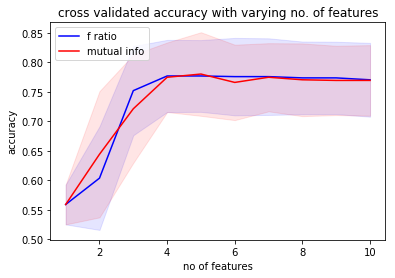

In [20]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import Imputer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import mutual_info_classif

from sklearn.model_selection import KFold,StratifiedKFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score, cross_validate #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
from sklearn.metrics import recall_score, f1_score, precision_score, accuracy_score
from sklearn.metrics.scorer import make_scorer


results_f = list()
std_f = list()
results_mi = list()
std_mi = list()
cv = StratifiedKFold(n_splits=10)
model_Logistic_Regression = LogisticRegression(penalty= 'l2', C = 0.01)


for i in range(1,11,1):
    pipe = Pipeline([('select_feat',SelectKBest(k=i)),
                ('clf',model_Logistic_Regression)])
    cv_scores = cross_val_score(pipe,X,y,cv=cv,n_jobs=-1)
    results_f.append(cv_scores.mean())
    std_f.append(cv_scores.std())
    pipe = Pipeline([('select_feat',SelectKBest(k=i,score_func = mutual_info_classif)),
                ('clf',model_Logistic_Regression)])
    cv_scores = cross_val_score(pipe,X,y,cv=cv,n_jobs=-1)
    results_mi.append(cv_scores.mean())
    std_mi.append(cv_scores.std())
    
results_mi,std_mi,results_f,std_f = np.array(results_mi),np.array(std_mi),np.array(results_f),np.array(std_f)    
plt.plot(range(1,11,1),results_f,c='b',label='f ratio')
plt.fill_between(range(1,11,1),results_f-std_f,results_f+std_f,alpha = .1,color='b')
plt.plot(range(1,11,1),results_mi,c='r',label = 'mutual info')
plt.fill_between(range(1,11,1),results_mi-std_mi,results_mi+std_mi,alpha=.1,color='r')
plt.legend(loc='upper left')
plt.xlabel('no of features')
plt.ylabel('accuracy')
plt.title('cross validated accuracy with varying no. of features')
plt.show()

Optimal number of features : 7
Best features : Index(['age', 'cp', 'trestbps', 'chol', 'thalach', 'exang', 'oldpeak'], dtype='object')


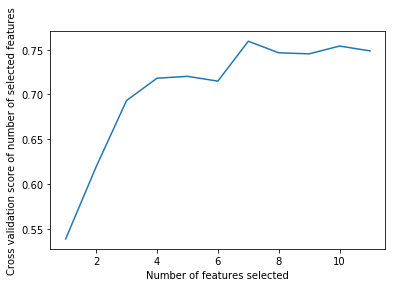

['sex', 'fbs', 'restecg', 'slope']

In [19]:
from sklearn.feature_selection import RFECV

# The "accuracy" scoring is proportional to the number of correct classifications
cv = StratifiedKFold(n_splits=10)

clf_rf_4 = RandomForestClassifier() 
rfecv = RFECV(estimator=clf_rf_4, step=1, cv=cv,scoring='accuracy')   #5-fold cross-validation
rfecv = rfecv.fit(X, y)

print('Optimal number of features :', rfecv.n_features_)
print('Best features :', X.columns[rfecv.support_])

# Plot number of features VS. cross-validation scores

plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score of number of selected features")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

a = ['a','b', 'c', 'd', 'e','f','d']
b =['a', 'b','c', 'd']
drop_list = [x for x in X.columns if x not in X.columns[rfecv.support_]]
drop_list


Feature ranking:
1. feature 2 (0.186184)
2. feature 0 (0.147493)
3. feature 7 (0.136014)
4. feature 4 (0.118631)
5. feature 9 (0.099231)
6. feature 3 (0.098546)
7. feature 8 (0.094437)
8. feature 1 (0.045539)
9. feature 6 (0.031044)
10. feature 10 (0.028599)
11. feature 5 (0.014281)


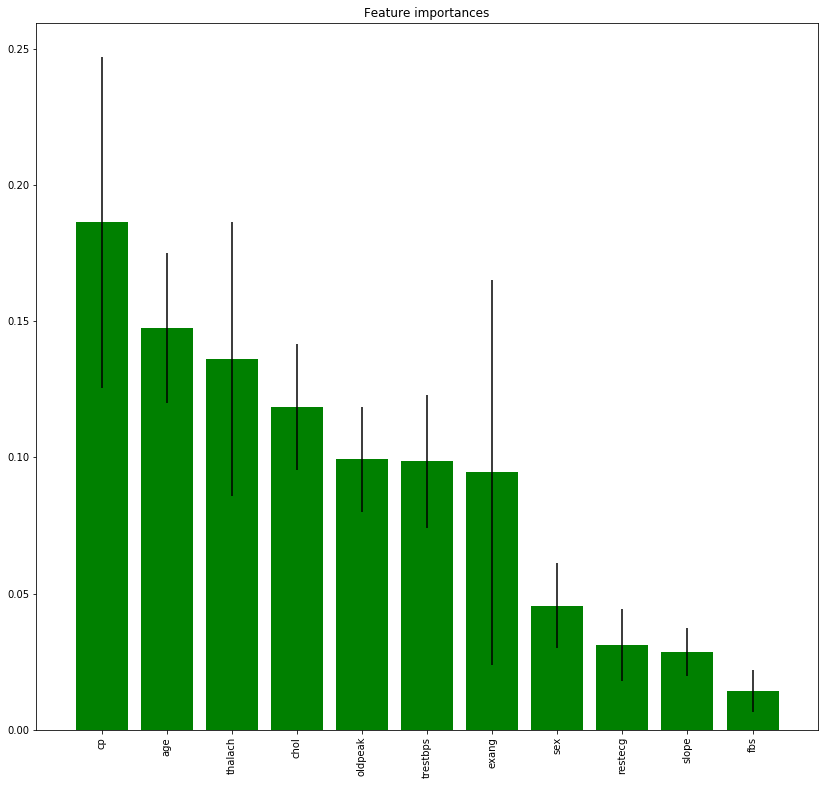

In [23]:
clf_rf_5 = RandomForestClassifier()      
clr_rf_5 = clf_rf_5.fit(X,y)
importances = clr_rf_5.feature_importances_
std = np.std([tree.feature_importances_ for tree in clr_rf_5.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest

plt.figure(1, figsize=(14, 13))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="g", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices],rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

In [6]:
from sklearn.feature_selection import VarianceThreshold

def remove_feat_constants(data_frame):
    # from https://www.kaggle.com/tuomastik/santander-customer-satisfaction/pca-visualization
    # script by Tuomas Tikkanen
    # Remove feature vectors containing one unique value,
    # because such features do not have predictive value.
    # Let's get the zero variance features by fitting VarianceThreshold
    # selector to the data, but let's not transform the data with
    # the selector because it will also transform our Pandas data frame into
    # NumPy array and we would like to keep the Pandas data frame. Therefore,
    # let's delete the zero variance features manually.
    n_features_originally = data_frame.shape[1]

    selector =  VarianceThreshold(threshold=(.8 * (1 - .8)))
    selector.fit(data_frame)
    # Get the indices of zero variance feats
    feat_ix_keep = selector.get_support(indices=True)
    orig_feat_ix = np.arange(data_frame.columns.size)
    feat_ix_delete = np.delete(orig_feat_ix, feat_ix_keep)
    # Delete zero variance feats from the original pandas data frame
    data_frame = data_frame.drop(labels=data_frame.columns[feat_ix_delete],
                                 axis=1)
    # Print info
    n_features_deleted = feat_ix_delete.size
    print("  - Deleted %s / %s features (~= %.1f %%)" % (
        n_features_deleted, n_features_originally,
        100.0 * (np.float(n_features_deleted) / n_features_originally)))
    return data_frame

In [7]:
df_reduced = remove_feat_constants(df)
df_reduced.info()
df = df_reduced

  - Deleted 1 / 12 features (~= 8.3 %)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 919 entries, 0 to 919
Data columns (total 11 columns):
age             919 non-null float64
sex             919 non-null float64
cp              919 non-null category
trestbps        919 non-null float64
chol            919 non-null float64
restecg         919 non-null float64
thalach         919 non-null float64
exang           919 non-null float64
oldpeak         919 non-null float64
slope           919 non-null float64
heartdisease    919 non-null category
dtypes: category(2), float64(9)
memory usage: 113.9 KB
